### Load Modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare/collect data

In [4]:
import os

path = os.listdir(r"C:\Users\zarya\Desktop\brain-tumor-detection-dataset\brain_tumor\Training")
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [5]:
import cv2
X = []
Y = []
for cls in classes:
    pth = r"C:\Users\zarya\Desktop\brain-tumor-detection-dataset\brain_tumor\Training\\"+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [6]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [7]:
np.unique(Y)

array([0, 1])

In [8]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [9]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

### Visualize data

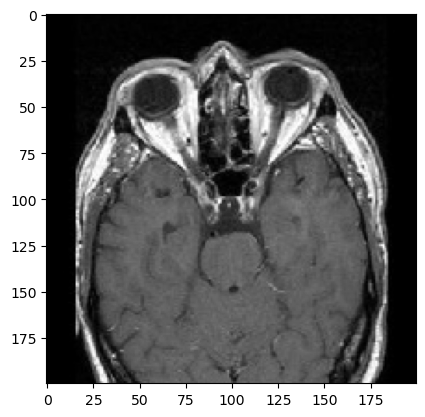

In [10]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [11]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

### Split Data

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [13]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

### Feature Scaling

In [14]:
print("Before:")
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print('After')
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

Before:
255 0
255 0
After
1.0 0.0
1.0 0.0


### Import Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Applying Logistic Regression

In [16]:
lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


C:\Users\zarya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

## Applying SVM

In [17]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

## Applying Decission Tree

In [18]:
dt= DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

## Applying Random Forest

In [19]:
rf= RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

### Evaluation

In [20]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [21]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


In [22]:
print("Training Score:", dt.score(xtrain, ytrain))
print("Testing Score:", dt.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [23]:
print("Training Score:", rf.score(xtrain, ytrain))
print("Testing Score:", rf.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9795918367346939


### Prediction

In [24]:
pred = rf.predict(xtest)
pred

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1])

In [26]:
ypred = dt.predict(xtest)
ypred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

In [27]:
y_pred = sv.predict(xtest)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1])

In [28]:
Y_pred = lg.predict(xtest)
Y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1])

## Confussion Metrics:

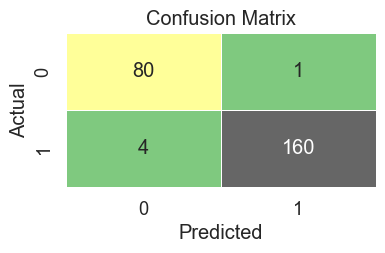

In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4, 2))  # Adjust the figure size as needed
sns.set(font_scale=1.2)  # Adjust font scale if necessary
sns.heatmap(confusion_matrix(ytest, pred), annot=True, fmt='d', cmap='Accent', linewidths=.5, cbar=False)

# Set axis labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

## Classification Report

In [25]:
import pandas as pd
from sklearn. metrics import classification_report
print("Random Forest Classification Report")
report = classification_report(ytest, pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

Random Forest Classification Report
              precision    recall  f1-score     support
0              0.952381  0.987654  0.969697   81.000000
1              0.993789  0.975610  0.984615  164.000000
accuracy       0.979592  0.979592  0.979592    0.979592
macro avg      0.973085  0.981632  0.977156  245.000000
weighted avg   0.980099  0.979592  0.979683  245.000000


In [45]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  3, 128, 139, 227, 235], dtype=int64),)

In [46]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[3],ytest[3])

Total Misclassified Samples:  5
1 0


In [29]:
print("Decision Tree Classification Report")
report = classification_report(ytest, ypred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

Decision Tree Classification Report
              precision    recall  f1-score     support
0              0.927711  0.950617  0.939024   81.000000
1              0.975309  0.963415  0.969325  164.000000
accuracy       0.959184  0.959184  0.959184    0.959184
macro avg      0.951510  0.957016  0.954175  245.000000
weighted avg   0.959572  0.959184  0.959307  245.000000


In [30]:
print("SVM Classification Report")
report = classification_report(ytest, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

SVM Classification Report
              precision    recall  f1-score     support
0              0.961538  0.925926  0.943396   81.000000
1              0.964072  0.981707  0.972810  164.000000
accuracy       0.963265  0.963265  0.963265    0.963265
macro avg      0.962805  0.953817  0.958103  245.000000
weighted avg   0.963234  0.963265  0.963085  245.000000


In [31]:
print("Logistic Regression Classification Report")
report = classification_report(ytest, Y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

Logistic Regression Classification Report
              precision    recall  f1-score     support
0              0.973333  0.901235  0.935897   81.000000
1              0.952941  0.987805  0.970060  164.000000
accuracy       0.959184  0.959184  0.959184    0.959184
macro avg      0.963137  0.944520  0.952979  245.000000
weighted avg   0.959683  0.959184  0.958765  245.000000


### TEST MODEL

In [47]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

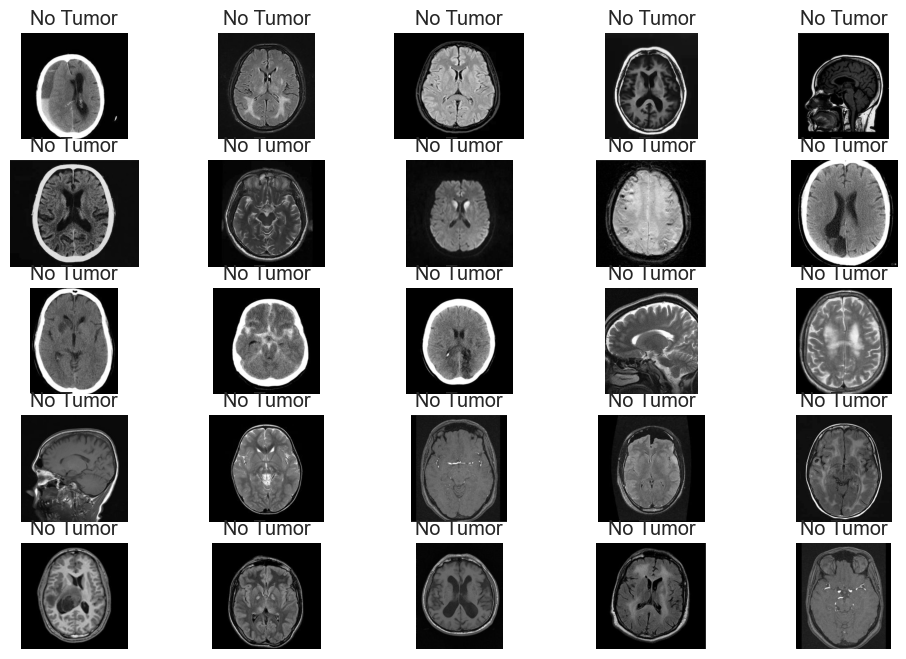

In [63]:
plt.figure(figsize=(12,8))
p = os.listdir(r"C:\Users\zarya\Desktop\brain-tumor-detection-dataset\brain_tumor\Testing")
c=1
for i in os.listdir(r"C:\Users\zarya\Desktop\brain-tumor-detection-dataset\brain_tumor\Testing\no_tumor\\")[:25]:
    plt.subplot(5,5,c)
    
    img = cv2.imread(r"C:\Users\zarya\Desktop\brain-tumor-detection-dataset\brain_tumor\Testing\no_tumor\\"+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = rf.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1


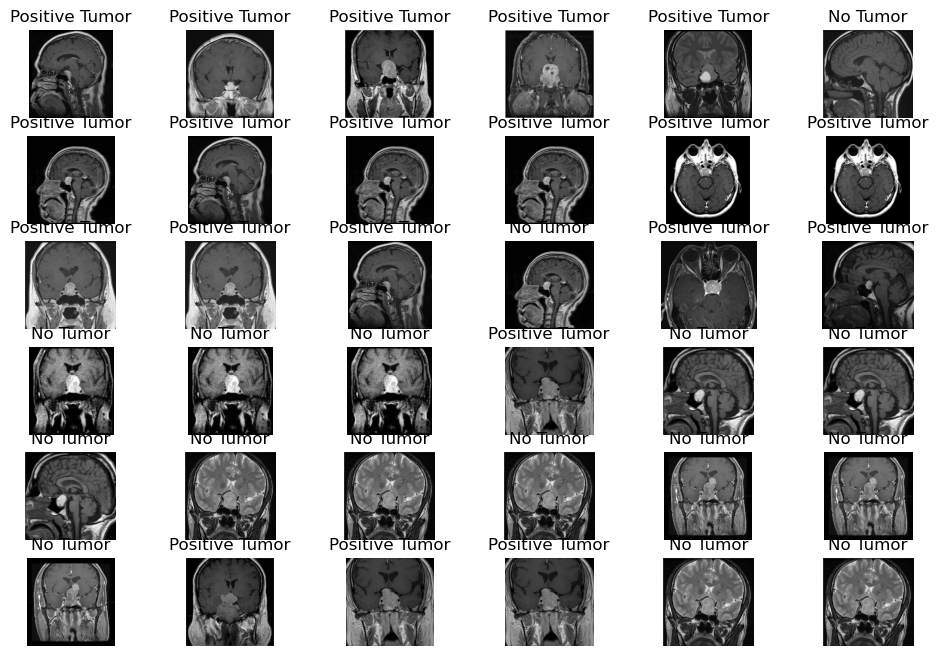

In [49]:
plt.figure(figsize=(12,8))
p = os.listdir(r"C:\Users\zarya\Desktop\brain-tumor-detection-dataset\brain_tumor\Testing")
c=1
for i in os.listdir(r"C:\Users\zarya\Desktop\brain-tumor-detection-dataset\brain_tumor\Testing\pituitary_tumor\\")[:36]:
    plt.subplot(6,6,c)
    
    img = cv2.imread(r"C:\Users\zarya\Desktop\brain-tumor-detection-dataset\brain_tumor\Testing\pituitary_tumor\\"+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = rf.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1